In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
df_1 = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/2021_IN_Region_Mobility_Report.csv')
df_2 = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/cowin_vaccine_data_districtwise.csv')
df_3 = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/districts.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

In [58]:
dataframe = pd.DataFrame(columns = ["sites", "confirmed", "death", "recovered", "grocery","Covaxin (Doses Administered)", "CoviShield (Doses Administered)"], index=range(10))

In [59]:
Delhi_grocery_arr = np.array([])
Delhi_grocery_dict = {}
date_count = {}
data_count = {"sites": 0, "confirmed": 0, "death": 0, "recovered": 0, "grocery": 0,"Covaxin (Doses Administered)": 0, "CoviShield (Doses Administered)": 0}
for ind in df_1.index:
    if df_1['sub_region_1'][ind] == 'Delhi':
        dummy1 = df_1['date'][ind]
        date_list = dummy1.split('-')
        dummy2 = date_list[1] + '_' + date_list[0]
        if 1<= int(date_list[2]) <= 15 and int(date_list[1]) == 1:
            continue
        else:
            if Delhi_grocery_dict.get(dummy2) == None:
                date_count[dummy2] = 1
                Delhi_grocery_dict[dummy2] = df_1['grocery_and_pharmacy_percent_change_from_baseline'][ind]
            else:
                date_count[dummy2] += 1
                Delhi_grocery_dict[dummy2] += df_1['grocery_and_pharmacy_percent_change_from_baseline'][ind]

Delhi_grocery_dict = dict(list(Delhi_grocery_dict.items())[0:10])
for key in Delhi_grocery_dict:
    Delhi_grocery_dict[key] = Delhi_grocery_dict[key]/date_count[key]

for key, value in Delhi_grocery_dict.items():
    dataframe.loc[data_count["grocery"], "grocery"] = value
    data_count["grocery"] += 1

In [60]:
index_of_delhi = []
previous_date_list = [1,1,2021]
for column in df_2:
    # Getting the index of Delhi
    if column == 'State':
        count = 1
        for row in df_2[column]:
            count += 1
            if row == 'Delhi':
                index_of_delhi.append(count)
    
    dummy = column.replace('.','-')
    date_list = dummy.split('-')
    try:
        if ((int(date_list[0]) < int(previous_date_list[0])) or (int(date_list[0]) == 31 and int(date_list[1]) == 10)) and len(date_list) == 3:
            count = 1
            dummy1 = 0
            site_column_name = column+ '.'+ '2'
            covaxin_column_name = column + '.' + '8'
            covishield_column_name = column + '.' + '9'
            for row in df_2[site_column_name]:
                count += 1
                if str(row) == 'nan':
                    continue
                else:
                    if count in index_of_delhi:
                        dummy1 += int(row)
            dataframe.loc[data_count["sites"], "sites"] = dummy1
            data_count["sites"] += 1
            
            count = 1
            dummy1 = 0
            for row in df_2[covaxin_column_name]:
                count += 1
                if str(row) == 'nan':
                    continue
                else:
                    if count in index_of_delhi:
                        dummy1 += int(row)
            if data_count["Covaxin (Doses Administered)"] == 0:
                dataframe.loc[data_count["Covaxin (Doses Administered)"], "Covaxin (Doses Administered)"] = dummy1
            else:
                dataframe.loc[data_count["Covaxin (Doses Administered)"], "Covaxin (Doses Administered)"] = dummy1 - dataframe_covaxin
            data_count["Covaxin (Doses Administered)"] += 1
            dataframe_covaxin = dummy1
            
            count = 1
            dummy1 = 0
            for row in df_2[covishield_column_name]:
                count += 1
                if str(row) == 'nan':
                    continue
                else:
                    if count in index_of_delhi:
                        dummy1 += int(row)
            if data_count["CoviShield (Doses Administered)"] == 0:
                dataframe.loc[data_count["CoviShield (Doses Administered)"], "CoviShield (Doses Administered)"] = dummy1
            else:
                dataframe.loc[data_count["CoviShield (Doses Administered)"], "CoviShield (Doses Administered)"] = dummy1 - dataframe_covishield
            data_count["CoviShield (Doses Administered)"] += 1
            dataframe_covishield = dummy1
    except:
        continue
    previous_date_list = date_list

In [61]:
confirmed_dict = {}
recovered_dict = {}
death_dict = {}
month_dict = {"01": 31, "02": 28, "03": 31, "04": 30, "05":31, "06":30, "07":31, "08":31, "09":30, "10":31, "11": 30, "12": 31}
for ind in df_3.index:
    dummy1 = df_3['Date'][ind]
    date_list = dummy1.split('-')
    #print(date_list)
    dummy2 = date_list[1] + '_' + date_list[0]
    try:
        if df_3['State'][ind] == "Delhi" and month_dict[date_list[1]] == int(date_list[2]):
            dummy2 = str(int(date_list[1])) + '_' + date_list[0]
            confirmed_dict[dummy2] = df_3['Confirmed'][ind]
            recovered_dict[dummy2] = df_3['Recovered'][ind]
            death_dict[dummy2] = df_3['Deceased'][ind]
    except:
        continue

confirmed_dict_copy = confirmed_dict.copy()
count = 0
for key, value in confirmed_dict.items():
    if count == 0:
        count += 1
        dummy = key
        continue
    else:
        confirmed_dict[key] = confirmed_dict[key] - confirmed_dict_copy[dummy]
        dummy = key

recovered_dict_copy = recovered_dict.copy()
count = 0
for key, value in recovered_dict.items():
    if count == 0:
        count += 1
        dummy = key
        continue
    else:
        recovered_dict[key] = recovered_dict[key] - recovered_dict_copy[dummy]
        dummy = key

death_dict_copy = death_dict.copy()
count = 0
for key, value in death_dict.items():
    if count == 0:
        count += 1
        dummy = key
        continue
    else:
        death_dict[key] = death_dict[key] - death_dict_copy[dummy]
        dummy = key

confirmed_dict = dict(list(confirmed_dict.items())[9:])
recovered_dict = dict(list(recovered_dict.items())[9:])
death_dict = dict(list(death_dict.items())[9:])

for key, value in confirmed_dict.items():
    dataframe.loc[data_count["confirmed"], "confirmed"] = value
    data_count["confirmed"] += 1
for key, value in recovered_dict.items():
    dataframe.loc[data_count["recovered"], "recovered"] = value
    data_count["recovered"] += 1
for key, value in death_dict.items():
    dataframe.loc[data_count["death"], "death"] = value
    data_count["death"] += 1

In [62]:
dataframe["vaccination_coverage"] = dataframe["Covaxin (Doses Administered)"] + dataframe["CoviShield (Doses Administered)"]
dataframe = dataframe.drop("Covaxin (Doses Administered)", axis=1)
dataframe = dataframe.drop("CoviShield (Doses Administered)", axis=1)

In [63]:
dataframe_copy = dataframe.copy()
dataframe

,sites,confirmed,death,recovered,grocery,vaccination_coverage
0,183,9727,317,13560,-10.359375,52760
1,335,4193,57,4162,5.75,314939
2,745,23141,117,15521,7.712366,987446
3,685,486903,5120,391260,-14.213889,1968104
4,811,276907,8090,357138,-40.188172,2146379
5,1329,7948,740,16869,-2.977778,2577320
6,106,2077,76,2799,10.303763,2021063
7,1148,1499,29,1702,16.803763,3506902
8,1287,1104,5,1048,20.05,4418261
9,715,1002,4,1050,31.467742,2406369


In [64]:
target_column = ['vaccination_coverage'] 
predictors = list(set(list(dataframe.columns))-set(target_column))
dataframe[predictors] = dataframe[predictors]/dataframe[predictors].max()
dataframe.describe()

,sites,confirmed,death,recovered,grocery,vaccination_coverage
count,10.000000,10.000000,10.000000,10.000000,10.000000,10
unique,10.000000,10.000000,10.000000,10.000000,10.000000,10
top,0.137698,0.019977,0.039184,0.034657,-0.329206,52760
freq,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [65]:
predictors

['grocery', 'death', 'confirmed', 'sites', 'recovered']

In [66]:
X = dataframe[predictors].values
y = dataframe[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(7, 5)
(3, 5)


In [67]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 

# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2)) 

0.0
1.0
1022316.1673921299
0.15990051780083014
0.0
1.0
1022316.1673921299
0.15990051780083014


In [68]:
#Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

451656.52912209777
0.8539324527646741
1124246.9204313178
-0.01597652254900539


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
dataframe_copy

,sites,confirmed,death,recovered,grocery,vaccination_coverage
0,183,9727,317,13560,-10.359375,52760
1,335,4193,57,4162,5.75,314939
2,745,23141,117,15521,7.712366,987446
3,685,486903,5120,391260,-14.213889,1968104
4,811,276907,8090,357138,-40.188172,2146379
5,1329,7948,740,16869,-2.977778,2577320
6,106,2077,76,2799,10.303763,2021063
7,1148,1499,29,1702,16.803763,3506902
8,1287,1104,5,1048,20.05,4418261
9,715,1002,4,1050,31.467742,2406369


In [70]:
dataframe_copy = dataframe_copy.astype(float)

In [71]:
dataframe_copy

,sites,confirmed,death,recovered,grocery,vaccination_coverage
0,183.0,9727.0,317.0,13560.0,-10.359375,52760.0
1,335.0,4193.0,57.0,4162.0,5.750000,314939.0
2,745.0,23141.0,117.0,15521.0,7.712366,987446.0
3,685.0,486903.0,5120.0,391260.0,-14.213889,1968104.0
4,811.0,276907.0,8090.0,357138.0,-40.188172,2146379.0
5,1329.0,7948.0,740.0,16869.0,-2.977778,2577320.0
6,106.0,2077.0,76.0,2799.0,10.303763,2021063.0
7,1148.0,1499.0,29.0,1702.0,16.803763,3506902.0
8,1287.0,1104.0,5.0,1048.0,20.050000,4418261.0
9,715.0,1002.0,4.0,1050.0,31.467742,2406369.0


In [72]:
print(dataframe_copy.corr())

                         sites  confirmed     death  recovered   grocery  \
sites                 1.000000  -0.007710  0.052541   0.014166  0.129089   
confirmed            -0.007710   1.000000  0.847212   0.968390 -0.651098   
death                 0.052541   0.847212  1.000000   0.952749 -0.844574   
recovered             0.014166   0.968390  0.952749   1.000000 -0.765620   
grocery               0.129089  -0.651098 -0.844574  -0.765620  1.000000   
vaccination_coverage  0.766755  -0.023389  0.002756  -0.013943  0.329414   

                      vaccination_coverage  
sites                             0.766755  
confirmed                        -0.023389  
death                             0.002756  
recovered                        -0.013943  
grocery                           0.329414  
vaccination_coverage              1.000000  


In [77]:
import statsmodels.api as sm
y_train = np.array(y_train, dtype=float)
X_train = np.array(X_train, dtype=float)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              4.371
Date:                Sun, 23 Oct 2022   Prob (F-statistic):                       0.197
Time:                        06:29:31   Log-Likelihood:                         -103.05
No. Observations:                   7   AIC:                                      216.1
Df Residuals:                       2   BIC:                                      215.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0, 0.5, 'Predicted Vaccination Coverage')

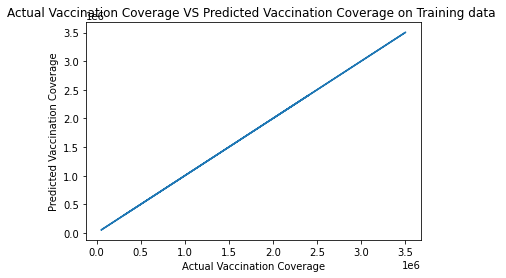

In [84]:
plt.plot(y_train, tr2)
plt.title("Actual Vaccination Coverage VS Predicted Vaccination Coverage on Training data ")
plt.xlabel("Actual Vaccination Coverage")
plt.ylabel("Predicted Vaccination Coverage")

Text(0, 0.5, 'Predicted Vaccination Coverage')

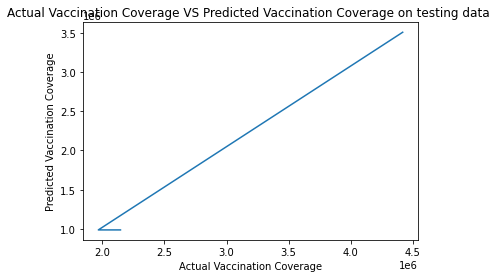

In [86]:
plt.plot(y_test, y2)
plt.title("Actual Vaccination Coverage VS Predicted Vaccination Coverage on testing data ")
plt.xlabel("Actual Vaccination Coverage")
plt.ylabel("Predicted Vaccination Coverage")